<br>
<font size=6>Разведывательный анализ данных</font>
<br>
<br>
<i>"Исследовать - значит видеть то, что видели все, и думать так, как не думал никто".</i>
<br><br>
<b>Разведывательный анализ данных</b> или <b>Exploratory Data Analysis (EDA)</b> играет важную роль в анализе данных.<br>
После получения набора данных, EDA ставит своей целью выяснить с чем мы работаем.<br>
<br>
Когда к нам в руки попадает набор данных, может возникнуть соблазн сразу же погрузиться в работу, начав строить модели и получать ответы.
Но первым шагом должен быть <b>разведывательный анализ</b>.<br>
<br>
Разведочный анализ данных означает изучение данных до самых глубин для получения из них практической информации. Он включает в себя анализ и обобщение массивных наборов данных, часто в форме диаграмм и графиков. Чем лучше вы знаете свои данные, тем лучше вы сможете их использовать.<br>
<br>

Материалы занятия:
- Книга "Data Science наука о данных с нуля", Джоэл Грас, 2е издание.
- Статья про <a href='https://waksoft.susu.ru/2021/07/23/issledovatelskij-analiz-dannyh-v-python-rukovodstvo-dlya-novichkov-na-2021-god/'>EDA</a>.
- Набор данных <a href='https://www.kaggle.com/datasets/spscientist/students-performance-in-exams'>Students Performance in Exams</a>.
<br>
<br>

<br>
<font size=4>Разведывание одномерных данных</font><br>
<br>
<b>Одномерный анализ</b> - это когда анализ переменных(колонок) выполняется по отдельности. Если мы анализируем переменную независимо от других переменных, то это и есть <b>одномерный анализ</b><br>
Простейший случай - у вас есть одномерный набор данных, просто коллекция чисел. Например, это может быть среднее число минут, которые каждый пользователь проводит на веб-сайте каждый день.<br>
<br>
Первым шагом будет вычисление нескольких сводных статистик. К примеру, можно выяснить количество точке данных, их минимальное, максимальное, среднее значение и стандартное отклонение.<br>
Но даже эти показатели не обязательно обеспечат вам понимание. Неплохой идеей будет попытка визуализации данных(блоковые диаграммы, гистрограммы и т.д.)<br>
<br>

<br>
<font size=4>Двумерные данные</font><br>
<br>
<b>Двумерный анализ</b> относится к изучению взаимосвязи между любыми двумя переменными в наборе данных.
<br>
Первым шагом будет вычисление нескольких сводных статистик. К примеру, можно выяснить количество точке данных, их минимальное, максимальное, среднее значение и стандартное отклонение.<br>
Но даже эти показатели не обязательно обеспечат вам понимание. Неплохой идеей будет попытка визуализации данных(блоковые диаграммы, гистрограммы и т.д.)<br>
<br>
Например, кроме ежедневного числа минут еще может учитываться количество друзей.<br>
<br>

Для такого анализа часто используют:
- Диаграммы рассеяния.
- Регрессионный анализ.
- Корреляционный анализ.
<br>
<br>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
data = pd.read_csv('data/StudentsPerformance.csv')

In [46]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<br>
<b>Первым делом</b> нужно внимательно изучить свои колонки, понять, что они означают и какую информацию в дальнейшем будут давать.<br>
Часто смысл колонки написал в описании к набору данных. Если 4-x значений не хватает, посмотрите какие вообще бывают значения в этой колонке.<br>
При необходимости стоит открыть весь файл и взглядом пробежаться по нему<br>
<br>

In [47]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

<br>
Полезно посмотреть на рандомную строку(в нашем случае на рандомного человека):<br>
<br>

In [48]:
data.iloc[np.random.randint(data.shape[0])]

gender                                   female
race/ethnicity                          group D
parental level of education    some high school
lunch                              free/reduced
test preparation course                    none
math score                                   48
reading score                                54
writing score                                53
Name: 961, dtype: object

<br>
<font size=5><b>Оценка переменных:</b></font><br>
<br>

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<br>
Итак, у нас три поля типа <b>int64</b> и пять типа <b>object</b>.<br>
Как и должно быть, числа - числами, строки - объектами, так бывает не всегда.<br>
<br>

<br>
Посмотрим небольшую статистику по числовым переменным.<br>
<br>

In [50]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<br>
При необходимости, можно проверить и категориальные перменные.<br>
<br>

In [51]:
data['race/ethnicity'].describe()

count        1000
unique          5
top       group C
freq          319
Name: race/ethnicity, dtype: object

<br>
<font size=5><b>Поиск пропусков</b></font>
<br>
<br>
Хорошо, мы посмотрели с чем нам предстоит работать, теперь нужно искать пропущенные значения, которые встречаются невероятно часто.<br>
Если такие были найдены, то предстоить решить эту проблему доступными методами, которые мы рассмотрим позже.<br>
<br>

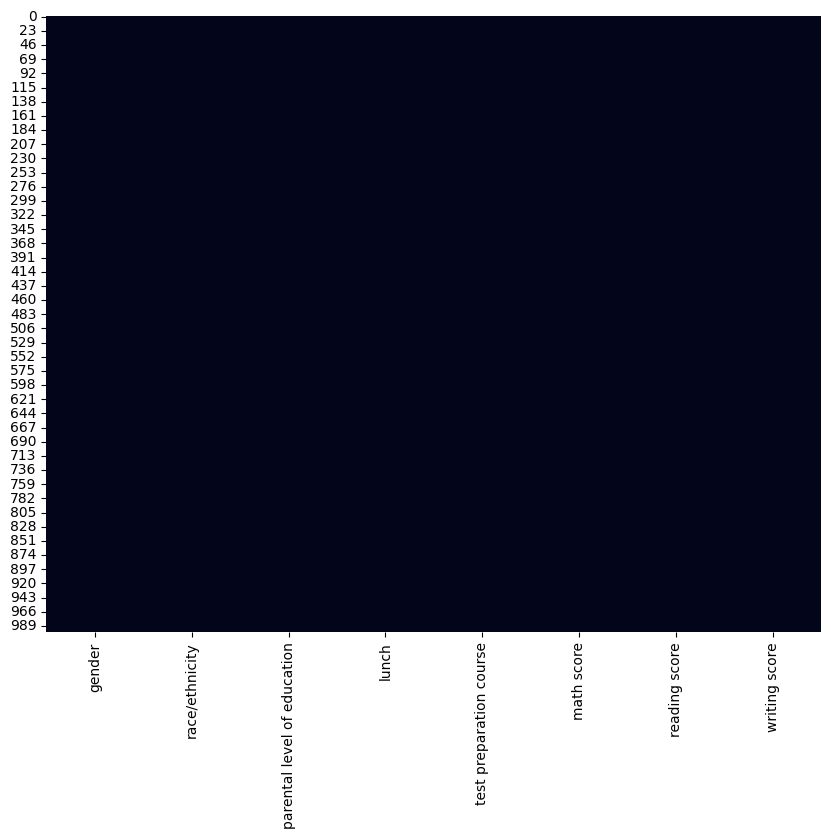


Количество пропусков в каждом столбце: 
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

print('\nКоличество пропусков в каждом столбце: ')
print(data.isnull().sum())

<br>
Heatmap и количество пропусков говорят о том, что пропусков нет.<br>
<br>
Стоит отметить, что такой способ ищет пропуски по NaN, но бывают случаи, когда пропуски записаны по-другому, например, как пустые ковычки " ", тогда isnull() не сможет найти пропуски. И придеться действовать по-другому.<br>
Один из способов - просто посмотреть какие значения вообще есть в переменной. Вот пример из другого набора данных:<br>
<br>
<img src='../data/total.jpg'><br>
<br>
Здесь пропуски записаны через пробелы, хотя isnull() показал, что пропусков нет:<br>
<br>
<img src='../data/total2.jpg'><br>
<br>
По сути если data.isnull() показал, что пропусков нет, то ему можно доверять только в числовых колонках, в категориальных же может храниться пропуск, как в примере выше.<br>
Поэтому сейчас мы посмотрим на пропуски в object данных подробней.<br>
<br>

In [54]:
categorical_columns = [col for col in data 
                       if data[col].dtypes == 'object']
for column in categorical_columns: 
    print('-'*5, column, '-'*5)
    print(data[column].value_counts())
    print('\n')

----- gender -----
female    518
male      482
Name: gender, dtype: int64


----- race/ethnicity -----
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


----- parental level of education -----
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


----- lunch -----
standard        645
free/reduced    355
Name: lunch, dtype: int64


----- test preparation course -----
none         642
completed    358
Name: test preparation course, dtype: int64




<br>
Все хорошо и никаких странных значений нет.<br>
<br>

<br>
<font size=5><b>ОДНОМЕРНЫЙ АНАЛИЗ</b></font><br>
<br>
Визуализируем то, что сделали немного выше<br>
<br>

In [11]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

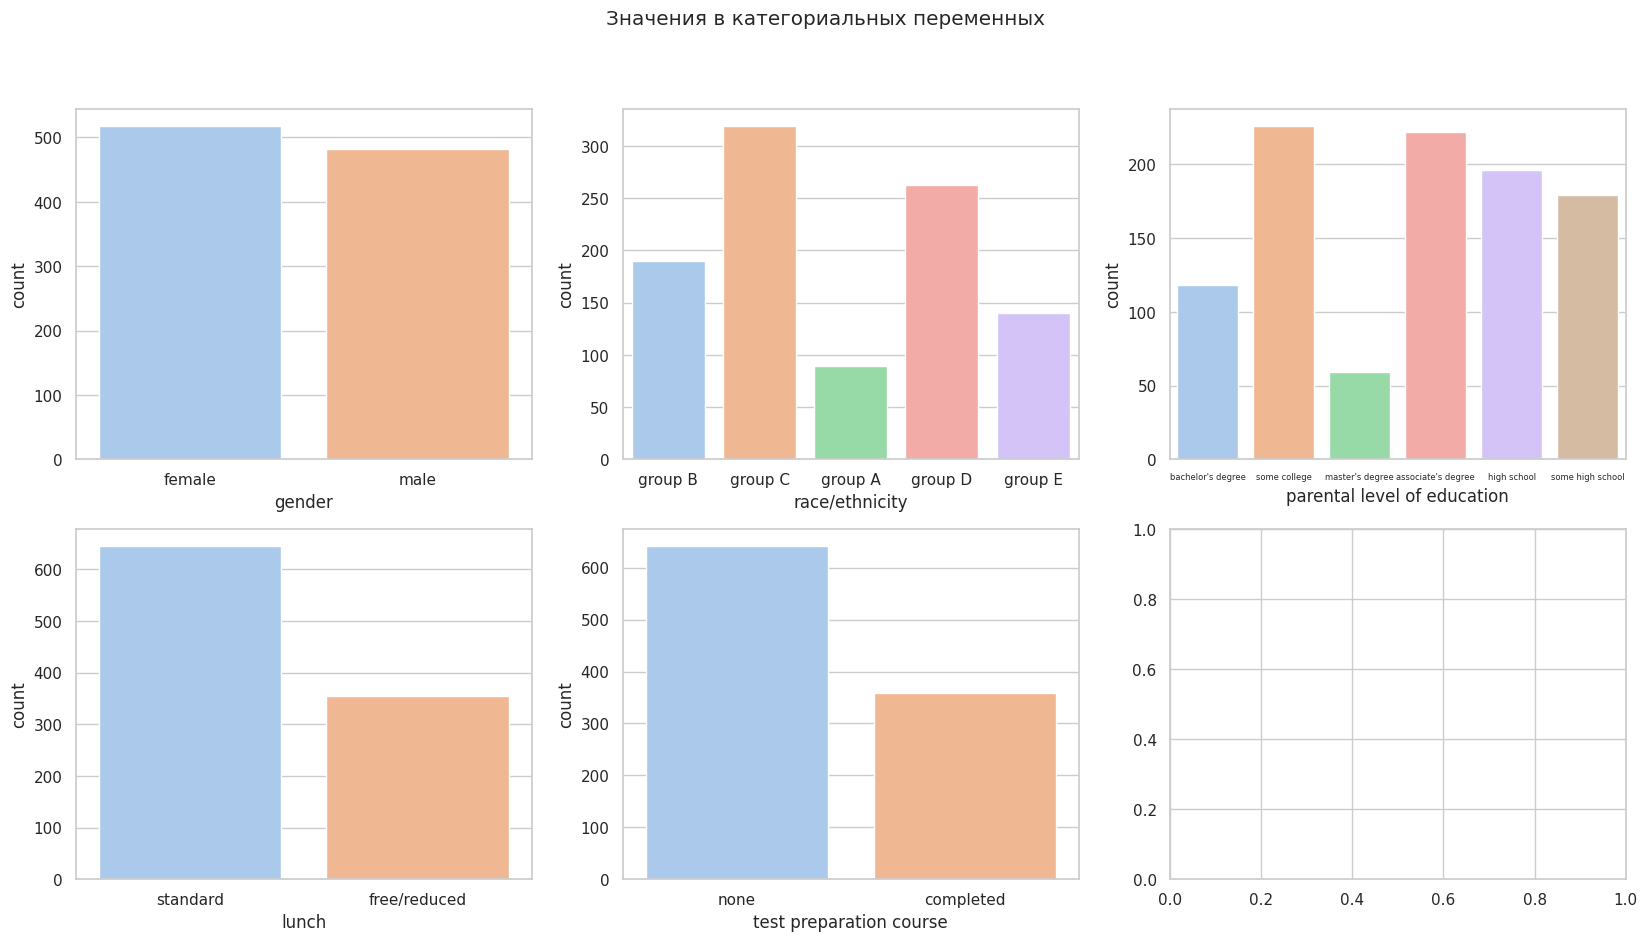

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()
fig.suptitle('Значения в категориальных переменных')

labels = data['parental level of education'].unique()
sns.set_theme(style='whitegrid', palette='pastel')
for i in range(len(categorical_columns)):
    ax[2].set_xticklabels(labels, fontsize=6)
    sns.countplot(ax=ax[i], x=categorical_columns[i], data=data)

<br>

Проанализируем графики:
- <b>gender:</b> Кол-во мужчин и женщин примерно равны, и отличаются только на 36. Если бы наша задача включала такой параметр, как пол человека, то разница в количестве могла бы плохо повлиять на результаты. Например, кто чаще получает высокие баллы за "чтение" мужчины или женщины, из-за разницы в количестве эксперементов, у женщин 518, а у мужчин 482, мы может допустить ошибку. И чем больше эта разница, тем больше будет ошибка. Такую проблему можно увидеть в <a href='https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BE%D0%BA%D1%81_%D0%A1%D0%B8%D0%BC%D0%BF%D1%81%D0%BE%D0%BD%D0%B0'>парадоксе симпсона</a>.<br> 
Но с другой стороны, если данные были собраны, например, с сайта, где любой желающий (с равной вероятностью) мог пройти тест на 'чтение', то мы могли бы сказать, что женщины просто больше проявляли желание пройти этот тест.<br>
- <b>race/ethnicity:</b> больше всего людей из <b>группы C</b> и меньше всего из <b>группы A</b>.<br>
- <b>parental level of education:</b> у большинства родителей есть как минимум степень младшего специалиста.<br>
- <b>lunch</b>: большинство детей имеют standard lunch<br>
- <b>test preparation course</b> большинство детей не проходили подготовительные курсы<br>
<br>

<br>
<font size=5><b>ДВУМЕРНЫЙ АНАЛИЗ</b></font><br>
<br>
Далее мы исследуем, есть ли какая-либо корреляция(зависимость) между отдельными функциями(столбцами), которые нам необходимо учитывать.<br>
<br>

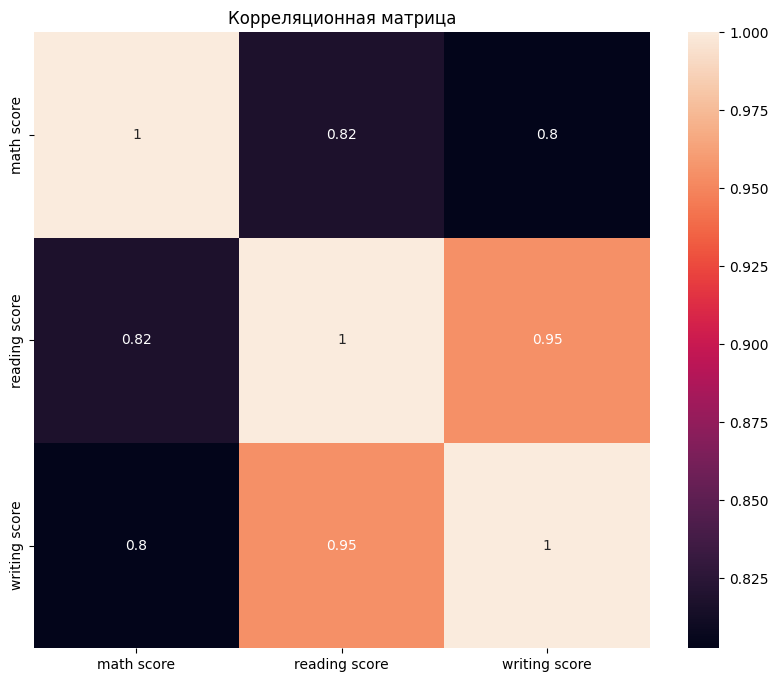

In [57]:
def corrmat(data: pd.DataFrame) -> None:
    """
       Построение корреляционной матрицы
       с коэффициентом корреляции Пирсона.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, square=True, annot_kws={'size': 10}).set_title('Корреляционная матрица')
    plt.show()
    
corrmat(data)

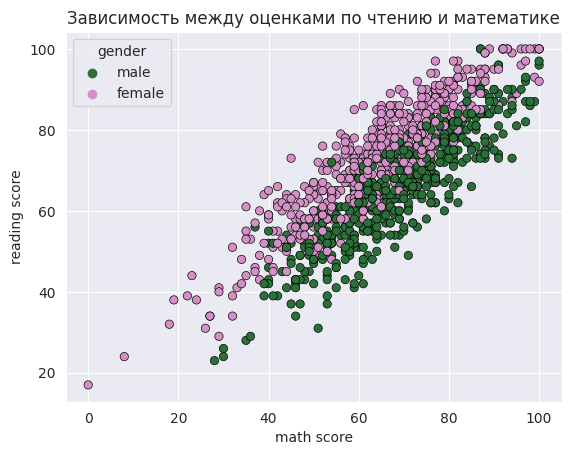

In [59]:
sns.set_style('darkgrid')
sns.scatterplot(x='math score', y='reading score', data=data, hue='gender', edgecolor='black', palette='cubehelix', hue_order=['male','female'])
plt.title('Зависимость между оценками по чтению и математике')
plt.show()

<br>
Здесь видно, что famale находится выше по reading score, по чтению женщины выигрывают у мужчин, но они в свою очередь выигрывают в математике.<br>
<br>

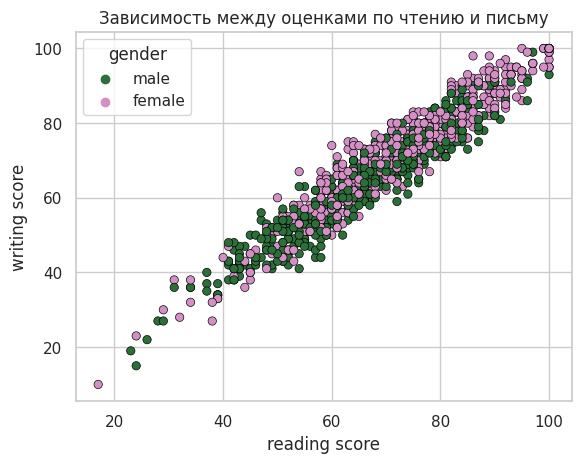

In [43]:
sns.set_style('whitegrid')
sns.scatterplot(x='reading score', y='writing score', data=data, hue='gender', edgecolor='black', palette='cubehelix', hue_order=['male','female'])
plt.title('Зависимость между оценками по чтению и письму')
plt.show()

<br>
Здесь уже трудно сказать, кто в чем выигрывает, видно только, что в конце женщин больше.<br>
<br>

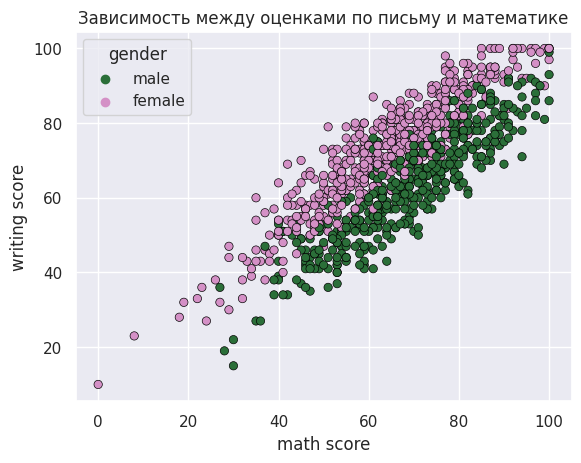

In [44]:
sns.set_style('darkgrid')
sns.scatterplot(x='math score', y='writing score', data=data, hue='gender', edgecolor='black', palette='cubehelix', hue_order=['male','female'])
plt.title('Зависимость между оценками по письму и математике')
plt.show()

<br>
Тоже самое, что и с первым графиком.<br>
<br>

<br>
Итак, диаграмма рассеяния предполагает высокую степень корреляции между оценками учащихся по разным предметам. Оценки учащихся по математике и (чтению, письму) мало разбросаны, но, как правило, они показывают рост, поэтому, если ученик набирает больше по математике, то он или она также обычно набирает больше по другим предметам. С другой стороны, зависимость оценок по чтению и письму более сгруппирована вдоль прямой линии.<br>
<br>

<br>
Построим график распределения для оценок по математике, чтению, письму и среднему баллу по трем предметам.<br>
<br>

In [69]:
total_marks = (data['math score'] + data['reading score'] + data['writing score']) / 3 # средний балл по трем предметам

In [72]:
data['интегральная оценка'] = total_marks

In [ ]:
kde_data = data[['math score','reading score','writing score','интегральная оценка']]

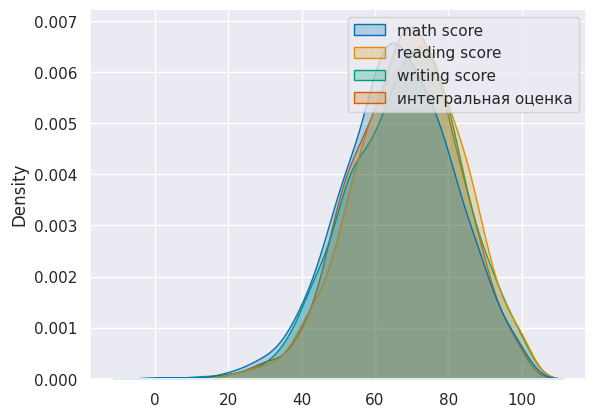

In [78]:
sns.set_style("darkgrid")
sns.kdeplot(data=kde_data,shade=True, palette='colorblind')
plt.show()  

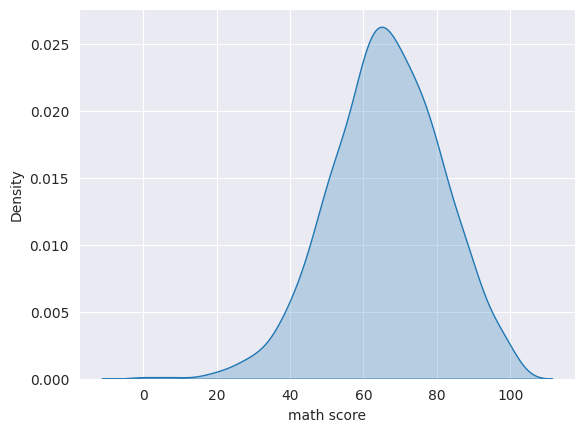

In [62]:
sns.set_style("darkgrid")
sns.kdeplot(data=data['math score'],shade=True, palette='colorblind')
plt.show()  